# Web Scraping with Beautiful Soup

### Importing packages

In [1]:
import requests

### How does the Internet Work?

The following is a five-minute video on how the Internet works. A basic understanding of this is necessary for us to work with web scraping

https://www.youtube.com/watch?v=7_LPdttKXPc

To perform HTPP requests in Python we will be working with [requests](http://docs.python-requests.org/en/master/). Fun fact: requests is the most downloaded Python packages of all time, receiving 400,000 downloads in a single day

In [2]:
response = requests.get("https://en.wikipedia.org/wiki/List_of_cities_in_Malaysia")

### HTTP Response Status

To understand if our HTTP requests is successful or not, we have to check the status code. The following [link]("https://developer.mozilla.org/en-US/docs/Web/HTTP/Status") explains each of the codes in detail, but generally these are the codes you can expect to see:

- 2xx Success (200 means your query was successful)
- 3xx Redirections
- 4xx Client errors (A familiar code would be error code 404: resource not found )
- 5xx Server errors

In [3]:
response.status_code

#You should receive the code '200' here which means that your request was successful

200

In [4]:
print(response.text) #Calling the text attribute of response allows us to see the HTML text from our query

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of cities in Malaysia - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_cities_in_Malaysia","wgTitle":"List of cities in Malaysia","wgCurRevisionId":837512714,"wgRevisionId":837512714,"wgArticleId":286432,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template archiveis links","Lists of cities by country","Lists of places in Malaysia","Malaysia geography-related lists"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDef

### Web Scraping 101

To Web Scrape is to retrieve data that exists on a website in a usable format for further analysis. Webpages are rendered by your web browser from HTML and CSS code. Useful content for us is usually stores as HTML.

In the following section we will perform the following:

- Get the HTML code of a given url.  We can use `urllib` or `requests` for that.
- Create a Beautiful Soup object which is an interfact to the Document Object Model (DOM)

As we know, HTML code is contained in angled brackets '<>'. These brackets provide structural information and are useful for selecting the content we want to see from the entire webpage.

For example, '< a >' refers to links on the webpage, and by finding all a tags, one can quickly access all the links on the webpage. BeautifulSoup enables us to select these HTML elements quickly.


#### Helpful Resources:
- [HTML Basics]("https://developer.mozilla.org/en-US/docs/Learn/Getting_started_with_the_web/HTML_basics")


## Beautiful Soup

[Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. The current supported version of Beautiful Soup is version 4.

To install:

```python
!pip install bs4
```

In [5]:
!pip install bs4

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
pip! install --upgrade pip


The following command must be run outside of the IPython shell:

    $ pip ! install --upgrade pip

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


### Usage

Right after the installation you can start using BeautifulSoup. At the beginning of your Python script, import the library

```python
from bs4 import BeautifulSoup
```

Now you have to pass something to BeautifulSoup to create a soup object. That could be a document or an URL. BeautifulSoup does not fetch the web page for you, you have to do that yourself. Libraries such as `urllib2` or `requests` can be used.

```python
import requests
```

**Parser**

Beautiful Soup supports the HTML parser included in Python’s standard library, but it also supports a number of third-party Python parsers. One is the lxml parser. Depending on your setup, you might install lxml with one of these commands:

```python
pip install lxml
```
or

```python
pip install html5lib
```
 

### Importing packages

In [7]:
#import requests #We already have this from before
from bs4 import BeautifulSoup

### Filtering

We can apply filters into methods such as `find_all` and can use these filters based on a tag’s name, on its attributes, on the text of a string, or on some combination of these. This enables us to quickly access HTML elements that we are interested in.

**EXAMPLE**

Suppose we have the following HTML document:

```html
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""
```

In [8]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

soup = BeautifulSoup(html_doc, 'lxml') #The lxml line here just specifies a HTML parser we want to use
print(soup)

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>


A handy function we have to create readable formatting is prettify(). It tidies up the spacing

In [9]:
print(soup.prettify()) #It is a lot easier to find elements when things are spaced appropriately

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


Run the following bits of code line by line to understand how we can access different tags through BS4

In [10]:
#print(soup.title) #This will access the 'title' tag
#print(soup.title.parent) #This will access the parent tag above the title
#print(soup.title.parent.name) #This gives us the name of the parent tag, which is head

Lets try to get the title of the 'webpage' we simulated above

In [11]:
print(soup.title)
print()
print(soup.title.name)
print()
print(soup.title.text)
print()
print(soup.title.parent.name)

<title>The Dormouse's story</title>

title

The Dormouse's story

head


We can get the whole content of our soup object with soup.contents. Note that while the output seems similar to just calling 'soup', the two objects are of different data type

In [12]:
print(soup.contents)
print()
print()
print(type(soup.contents))
print() #This just prints empty lines
print()
print(soup)
print()
print()
print(type(soup))

[<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>]


<class 'list'>


<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="s

We can specifically access the 'body' tag of our HTML document through soup.body

In [13]:
print(soup.body)

<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body>


We can access different tags such as the paragraph tag '< p >' and the link tags '< a >' in the following way

In [14]:
print(soup.p)

<p class="title"><b>The Dormouse's story</b></p>


In [15]:
print(soup.a)

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>


The 'class' above just refers to the class attribute which is used to point to a class in a style sheet.

If we want to find all of the tags, we can use the 'find_all' method on soup

In [16]:
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [17]:
ptags = soup.find_all('p')
print(len(ptags))
ptags

3


[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [18]:
## use find_all for all tags start with 'a' with class 'sister'
soup.find_all('a', {'class':'sister'}) #The attribute is passed in as a dictionary

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [20]:
soup.find_all('a', {'class':'sister', 'id':'link1'}) 

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>]

#### Challenge: find the a link with the id: link3

In [21]:
# your code here
soup.find_all('a', {'class':'sister', 'id':'link3'})

A common task when web scraping is extracting all the URLs found within a webpage's '< a >' tags. We have done so below through the use of a for loop

In [22]:
for link in soup.find_all('a'):
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


We can apply the same logic to extracting the text used as the hyperlink

In [23]:
for para in soup.find_all('a'):
    print(para.get_text())

Elsie
Lacie
Tillie


In [52]:
para?

Another common task is extracting all the text from a page

In [24]:
print(soup.get_text())

The Dormouse's story

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [25]:
# This code only retrieves text from the body tag of our fictitious website

print(soup.find('body').get_text())


The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



### Regular Expressions (Regex) 


We can pass in a regular expression object, Beautiful Soup will filter against
that regular expression using its match() method. 

This code finds all the tags whose names start with the letter "b",
in this case, the 'body' tag and the 'b' tag:

In [26]:
import re

In [27]:
for tag in soup.find_all(re.compile("^b")):
    print(tag.name)

body
b


In [28]:
for tag in soup.find_all(re.compile("t")):
    print(tag.name)

html
title


The code below does not work because we did not use regular expressions. Soup is searching for a tag < t > which does not exist in our fictitious HTML. It would work with "b" however.

In [29]:
for tag in soup.find_all("t"): #did not use the re package here
    print(tag.name)

## List

We can pass in a list, Beautiful Soup will allow a string match against any
item in that list. 

This code finds all the 'p' tags and all the 'b' tags

In [30]:
print(soup.find_all(["p", "b"]))

[<p class="title"><b>The Dormouse's story</b></p>, <b>The Dormouse's story</b>, <p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>, <p class="story">...</p>]


## Navigating the Parse Tree

If you want to know how to navigate the tree please see the official [documentation](http://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigating-the-tree)

There you can read about the following things:

**Going down**
* Navigating using tag names 
 * contents and children
 * descendants
 * string
 * strings and stripped_strings

**Going up**
* parent
* parents

**Going sideways**
* next_sibling and .previous_sibling 
* next_siblings and .previous_siblings 

**Going back and forth**
* .next_element and .previous_element
* .next_elements and .previous_elements

# Web Scraping Workflow

1. Find the data you want on the web.
2. Inspect the webpage and figure out how to select the content you want. This usually involves some combination of
    - Viewing the source code of the page (especially if it is simple), and
    - Figuring out the structure of the HTML parse tree.  This step is much easier with a something like __Chrome Developer Tools__.
3.  Write code to get out what you want:
    - If the page is very simple, treat it as a bunch of text => __string manipulation / [regular expressions](https://docs.python.org/2/howto/regex.html)__ in Python.
    - To have a more robust solution, it is better to use the HTML parse tree => __[BeautifulSoup](http://www.crummy.com/software/BeautifulSoup/bs4/doc/) / [lxml](http://lxml.de/lxmlhtml.html)__ in Python.
4.  Make sure it worked!
5.  If your crawling problem is at all non-trivial, you will now have to go back to Step 2 to zoom in further -- or you'll have parsed the URL of a link you want to follow, in which case you'll go back to Step 1 to figure out how to parse what you want from the new target page.

## Exercise 1

Given the following page from https://en.wikipedia.org/wiki/List_of_cities_in_Malaysia, extract all the filenames and their links

In [31]:
url = "https://en.wikipedia.org/wiki/List_of_cities_in_Malaysia"
    
response1 = requests.get(url)
soup1 = BeautifulSoup(response1.text, 'lxml')
print(soup1)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of cities in Malaysia - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_cities_in_Malaysia","wgTitle":"List of cities in Malaysia","wgCurRevisionId":837512714,"wgRevisionId":837512714,"wgArticleId":286432,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template archiveis links","Lists of cities by country","Lists of places in Malaysia","Malaysia geography-related lists"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDef

#### Problem 1

The first thing you should do from here is prettify your soup1 and inspect the general structure 

In [56]:
# your code here
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="2f26647729bf248b-f2b32987adcfc8b8-gbe489916db8e3e69-11" name="google-translate-customization"/>
  <title>
   Phone - Page 10 Malaysia
  </title>
  <meta content="Phone Malaysia price, harga; telefon bimbit; Price list of Malaysia Phone products from sellers on Lelong.my" name="description"/>
  <!-- Twitter Card data -->
  <meta content="product" name="twitter:card"/>
  <meta content="@LelongMy" name="twitter:site"/>
  <meta content="@LelongMy" name="twitter:creator"/>
  <meta content="Phone - Page 10 Malaysia" name="twitter:title"/>
  <meta content="Phone Malaysia price, harga; telefon bimbit; Price list of Malaysia Phone products from sellers on Lelong.my" name="twitter:description"/>
  <meta content="https://c.76.my/res/img/lelong-logo-1200x630.png" name="twitter:image"/>
  <meta content="keyword

#### Problem 2

Retrieve the title in string format of the webpage

In [59]:
# your code here
print(soup.title.string)

Phone - Page 10 Malaysia


#### Problem 3

Retrieve all the links on your website. Remember that these are contained in the 'a' tags

In [65]:
# your code here
for link in soup.find_all('a'):
    print(link.get('href'))

#
javascript:submitLanguage('/home/setculture/ms', 'Set the language as Bahasa')
javascript:submitLanguage('/home/setculture/zh', 'Set the language as Chinese')
//www.lelong.com.my
http://members.lelong.com.my/cart/ShoppingCart
http://members.lelong.com.my/Auc/Member/WatchList/WatchList.asp?L=8
https://members.lelong.com.my/Account/Login?ver=net
https://members.lelong.com.my/account/register?ver=lelong&hearFrom=TOP
https://members.lelong.com.my/Account/Login?ver=net
https://members.lelong.com.my/account/register?ver=lelong&hearFrom=TOP
http://members.lelong.com.my/Member/
http://members.lelong.com.my/Auc/Member/MyOrder/ViewMyOrder.asp?L=5
http://www.lelong.com.my/TCHO2
//members.lelong.com.my/Member/PM/PM.asp?a=open
http://members.lelong.com.myAuc/Account/MyProfile.asp?L=41
https://www.lmall.my/
//www.lelong.com.my
//www.lelong.com.my/WebStore/
//www.lelong.com.my/content/edc/master
//www.lelong.com.my/catalog/all/list/?TheKeyword=ikea&CategoryID=251&naNetPay=Y&viewtype=gridview
//www.

#### Problem 4 

Find all the tables, and then find the specific table that contains the state names that we are interested in

In [35]:
soup1.find_all('table') #You can actually check this by going 
#to the website and right clicking on the table you are interested in

[<table class="wikitable sortable">
 <tr>
 <th>Name</th>
 <th>State/FT</th>
 <th>Local government(s)</th>
 <th>Chartered</th>
 <th>Population<br/>
 <span style="font-size:85%;">(2010 Census)</span></th>
 <th>Ref.</th>
 </tr>
 <tr>
 <td><a href="/wiki/George_Town,_Penang" title="George Town, Penang">George Town</a><br/>
 <a href="/wiki/Penang_Island" title="Penang Island">Penang Island</a></td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="512" data-file-width="1024" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Penang_%28Malaysia%29.svg/23px-Flag_of_Penang_%28Malaysia%29.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Penang_%28Malaysia%29.svg/35px-Flag_of_Penang_%28Malaysia%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Penang_%28Malaysia%29.svg/46px-Flag_of_Penang_%28Malaysia%29.svg.png 2x" width="23"/> </span><a href="/wiki/Penang" title="Penang">Penang</a></td>


In [36]:
right_table = soup1.find('table', class_ = 'wikitable sortable')

In [37]:
right_table

<table class="wikitable sortable">
<tr>
<th>Name</th>
<th>State/FT</th>
<th>Local government(s)</th>
<th>Chartered</th>
<th>Population<br/>
<span style="font-size:85%;">(2010 Census)</span></th>
<th>Ref.</th>
</tr>
<tr>
<td><a href="/wiki/George_Town,_Penang" title="George Town, Penang">George Town</a><br/>
<a href="/wiki/Penang_Island" title="Penang Island">Penang Island</a></td>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="512" data-file-width="1024" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Penang_%28Malaysia%29.svg/23px-Flag_of_Penang_%28Malaysia%29.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Penang_%28Malaysia%29.svg/35px-Flag_of_Penang_%28Malaysia%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Penang_%28Malaysia%29.svg/46px-Flag_of_Penang_%28Malaysia%29.svg.png 2x" width="23"/> </span><a href="/wiki/Penang" title="Penang">Penang</a></td>
<td><a href="/

In [38]:
list1 = []

for link in right_table.find_all('a'):
    list1.append(link.get('title'))
    
list1

['George Town, Penang',
 'Penang Island',
 'Penang',
 'Penang Island City Council',
 'Penang Island',
 'Kuala Lumpur',
 'Federal Territory (Malaysia)',
 'Federal Territories (Malaysia)',
 'Kuala Lumpur City Hall',
 'Ipoh',
 'Perak',
 'Ipoh City Council',
 'Kuching',
 'Sarawak',
 'Kuching North City Hall',
 'Kuching South City Council',
 'Johor Bahru',
 'Johor',
 'Johor Bahru City Council',
 'Kota Kinabalu',
 'Sabah',
 'Kota Kinabalu City Hall',
 'Shah Alam',
 'Selangor',
 'Shah Alam City Council',
 'Melaka City',
 'Malacca',
 'Melaka City Council',
 'Alor Setar',
 'Kedah',
 'Alor Setar City Council',
 'Miri, Malaysia',
 'Sarawak',
 'Miri City Council',
 'Petaling Jaya',
 'Selangor',
 'Petaling Jaya City Council',
 'Kuala Terengganu',
 'Terengganu',
 'Kuala Terengganu City Council',
 'Iskandar Puteri',
 'Johor',
 'Iskandar Puteri City Council',
 'Seremban',
 'Negeri Sembilan',
 'Seremban Municipal Council']

In [39]:
import pandas as pd

df = pd.DataFrame(list1)
df

,0
0,"George Town, Penang"
1,Penang Island
2,Penang
3,Penang Island City Council
4,Penang Island
5,Kuala Lumpur
6,Federal Territory (Malaysia)
7,Federal Territories (Malaysia)
8,Kuala Lumpur City Hall
9,Ipoh


In [40]:
df1 = df.iloc[[2,7,10,13,17,20,23,26,29,32,35,38,41,44]] 

#Just pulling out the relevant states

In [41]:
df1.rename(columns={0:'State'})
#df1.reset_index(drop = True)

,State
2,Penang
7,Federal Territories (Malaysia)
10,Perak
13,Sarawak
17,Johor
20,Sabah
23,Selangor
26,Malacca
29,Kedah
32,Sarawak


## Do it yourself: Web Scraping

The goal of this mini-project is to scrape data from e-commerce or other websites such as
Lelong, Lazada, Mudah, iProperty, Booking, Expedia etc.

Scrape at least 1000 items from one of the website mentioned above. The scraped data should include:
- Product Name/Product Title
- Amount/Price 
- Brand
- Comments/Reviews
- Number of views


In addition, you are required to export the scraped data to dataframe format and also save a
copy in csv format. 

Upon successful extracting data to dataframe, you are required to do a data
analysis on the data.

Your analysis should provide answers to the following questions: 
* What do you think is interesting about this data? 
* Tell a story about some interesting thing you have discovered by looking at the data. 
* Visualize your data with matplotlib or with folium library package.

For example, you might consider whether there is a difference in pricings at different times
doing the day or city, or whether other factors that influnced the pricings etc. Another thing you
might consider is whether there is a relationship between the pricing and number of reviews or
comments.

Get your analysis workflow in your Jupyter notebook.

### Time package

These websites have algorithms to detect people that may be accessing large amounts of their data in a rapid fashion. Time helps us add a human-like pause to our code

We have to add **sleeps** in order not to be blacklisted by the website we are crawling

In [42]:
import time
for i in range(10):
    print(i)
    time.sleep(1)

0
1
2
3
4
5
6
7
8
9


The following code will scrape a lelong url and write the information into a CSV for us

In [43]:
import csv
import requests
from bs4 import BeautifulSoup


lelong_url='https://www.lelong.com.my/catalog/all/list'#this is the url we will look at

with open('phones_lelong.csv', 'w', encoding='utf-8', newline='') as csvfile:
    lelongwriter = csv.writer(csvfile)
    
# This is a context manager to open a file and write to it
    
    for page in range(1, 11):
        print("Querying page %s..." % page)
        response = requests.get(lelong_url, params={'TheKeyword':'phone', 'D': page})
        print('Got page %s' % page)
        soup = BeautifulSoup(response.text, 'lxml')
        results = soup.find_all('div', attrs={'class':'summary'})
        for product in results:
            b_element = product.find('b')
            price = float(b_element.get('data-price'))
            url = b_element.get('data-link')
            title = b_element.text
            lelongwriter.writerow([title, price, url])
        print('Sleeping...')
        time.sleep(1)
        print('Waking up!')


Querying page 1...
Got page 1
Sleeping...
Waking up!
Querying page 2...
Got page 2
Sleeping...
Waking up!
Querying page 3...
Got page 3
Sleeping...
Waking up!
Querying page 4...
Got page 4
Sleeping...
Waking up!
Querying page 5...
Got page 5
Sleeping...
Waking up!
Querying page 6...
Got page 6
Sleeping...
Waking up!
Querying page 7...
Got page 7
Sleeping...
Waking up!
Querying page 8...
Got page 8
Sleeping...
Waking up!
Querying page 9...
Got page 9
Sleeping...
Waking up!
Querying page 10...
Got page 10
Sleeping...
Waking up!


In [76]:
import pandas as pd

df2 = pd.read_csv('phones_lelong.csv', header = None)

In [77]:
df2.head()

,0,1,2
0,ORI SPIGEN IPHONE X Phone Case Cover Casing,59.0,//www.lelong.com.my/ori-spigen-iphone-x-phone-...
1,Long Neck One Touch Car Dashboard/Glass Mount ...,16.8,//www.lelong.com.my/long-neck-one-touch-car-da...
2,Sonoff Wifi Smart On/Off Switch & Timer Contro...,36.0,//www.lelong.com.my/sonoff-wifi-smart-switch-t...
3,HOCO J11 10000mAh Power Bank Dual USB Wireless...,139.0,//www.lelong.com.my/hoco-j11-10000mah-power-ba...
4,ORIGINAL SPIGEN Samsung Galaxy S9 Plus Phone C...,59.0,//www.lelong.com.my/original-spigen-samsung-ga...


In [78]:
df2.rename(columns = {0:'Summary', 1:'Price', 2:'Hyperlink'}, inplace = True)
df2.head()

,Summary,Price,Hyperlink
0,ORI SPIGEN IPHONE X Phone Case Cover Casing,59.0,//www.lelong.com.my/ori-spigen-iphone-x-phone-...
1,Long Neck One Touch Car Dashboard/Glass Mount ...,16.8,//www.lelong.com.my/long-neck-one-touch-car-da...
2,Sonoff Wifi Smart On/Off Switch & Timer Contro...,36.0,//www.lelong.com.my/sonoff-wifi-smart-switch-t...
3,HOCO J11 10000mAh Power Bank Dual USB Wireless...,139.0,//www.lelong.com.my/hoco-j11-10000mah-power-ba...
4,ORIGINAL SPIGEN Samsung Galaxy S9 Plus Phone C...,59.0,//www.lelong.com.my/original-spigen-samsung-ga...


In [79]:
#Some useful information about price from the data

print(df2.Price.mean())
print(df2.Price.max())
print(df2.Price.min())
print(len(df2)) # we have this many rows in our data

210.20668333333296
20100.0
3.0
600


In [95]:
#df2.Summary.str.lower()

In [93]:
df2.tail()

,Summary,Price,Hyperlink
595,IPhone 6 Plus (5.5') Flash Phone Casing Case C...,41.7,//www.lelong.com.my/iphone-6-plus-5-5-flash-ph...
596,MOBY Huawei Mate 9 Pro Mobile Phone Silicone P...,52.7,//www.lelong.com.my/moby-huawei-mate-9-pro-mob...
597,Apple iPhone 7/7+ silicon ultra thin transpare...,52.9,//www.lelong.com.my/apple-iphone-7-7-silicon-u...
598,Chrome Phone Casing Case Cover for Huawei P9 P...,58.7,//www.lelong.com.my/chrome-phone-casing-case-c...
599,Chrome Phone Casing Case Cover for Huawei P9 (...,58.7,//www.lelong.com.my/chrome-phone-casing-case-c...


In [49]:
brandlist = ['[sS]amsung','[sS]ony','[sS]pigen','[hH]uawei','[cC]elcom',
             '[aA]pple','[lL]G','[mM]otorola','[rR]azer','[pP]anasonic','[xX]iaomi','3M',
             '[oO]nePlus','[oO]ppo']

# The reason why we have [sS] is to enable string matching 
#for either upper or lower case in the name.

brandcounts = []
for brand in brandlist:
    
    brandcounts.append(len(df2[df2.Summary.str.contains(brand)]))
    
dict1 = dict(zip(brandlist,brandcounts))
df3 = pd.DataFrame.from_dict(dict1, orient = 'index')
df3.columns = ['Count']

In [50]:
print(df3.Count.sum())
len(df2)
# There may be unbranded goods or goods with brands we are not aware of

117


600

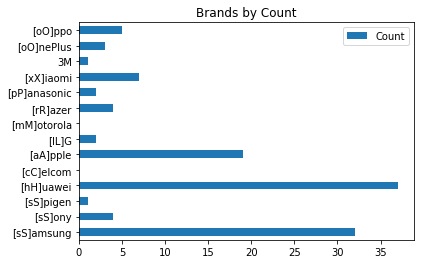

In [99]:
import matplotlib.pyplot as plt
df3.plot(kind = 'barh', title = 'Brands by Count')
plt.show()
# Note that this graph will look different every day because we are donwloading fresh data!